<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uncertainty-visualisation" data-toc-modified-id="Uncertainty-visualisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uncertainty visualisation</a></span></li><li><span><a href="#Uniform-distribution" data-toc-modified-id="Uniform-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uniform distribution</a></span><ul class="toc-item"><li><span><a href="#PDF-and-CDF" data-toc-modified-id="PDF-and-CDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PDF and CDF</a></span></li><li><span><a href="#System-resolution-with-Sympy" data-toc-modified-id="System-resolution-with-Sympy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>System resolution with Sympy</a></span></li><li><span><a href="#System-resolution-with-fsolve" data-toc-modified-id="System-resolution-with-fsolve-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>System resolution with fsolve</a></span></li></ul></li><li><span><a href="#Triangular-distribution" data-toc-modified-id="Triangular-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Triangular distribution</a></span><ul class="toc-item"><li><span><a href="#PDF-and-CDF" data-toc-modified-id="PDF-and-CDF-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PDF and CDF</a></span></li><li><span><a href="#System-resolution-with-sympy" data-toc-modified-id="System-resolution-with-sympy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>System resolution with sympy</a></span></li><li><span><a href="#System-resolution-with-fsolve" data-toc-modified-id="System-resolution-with-fsolve-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>System resolution with fsolve</a></span></li></ul></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normal distribution</a></span><ul class="toc-item"><li><span><a href="#PDF-and-CDF" data-toc-modified-id="PDF-and-CDF-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>PDF and CDF</a></span></li><li><span><a href="#System-resolution-with-fsolve" data-toc-modified-id="System-resolution-with-fsolve-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>System resolution with fsolve</a></span></li></ul></li><li><span><a href="#Weibull-distribution" data-toc-modified-id="Weibull-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weibull distribution</a></span><ul class="toc-item"><li><span><a href="#PDF-and-CDF" data-toc-modified-id="PDF-and-CDF-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PDF and CDF</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Using-scipy.curve_fit" data-toc-modified-id="Using-scipy.curve_fit-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Using scipy.curve_fit</a></span></li><li><span><a href="#Using-GEKKO" data-toc-modified-id="Using-GEKKO-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Using GEKKO</a></span></li></ul></li><li><span><a href="#System-resolution" data-toc-modified-id="System-resolution-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>System resolution</a></span></li></ul></li><li><span><a href="#Asymmetric-Laplace-distribution" data-toc-modified-id="Asymmetric-Laplace-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Asymmetric Laplace distribution</a></span></li><li><span><a href="#Reversed-lognormal" data-toc-modified-id="Reversed-lognormal-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reversed lognormal</a></span></li><li><span><a href="#Generalized-gamma-distribution" data-toc-modified-id="Generalized-gamma-distribution-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Generalized gamma distribution</a></span><ul class="toc-item"><li><span><a href="#PDF-and-CDF" data-toc-modified-id="PDF-and-CDF-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>PDF and CDF</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#scipy.curve_fit" data-toc-modified-id="scipy.curve_fit-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>scipy.curve_fit</a></span></li><li><span><a href="#GEKKO" data-toc-modified-id="GEKKO-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>GEKKO</a></span></li></ul></li></ul></li><li><span><a href="#Polynomial-distribution" data-toc-modified-id="Polynomial-distribution-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Polynomial distribution</a></span></li></ul></div>

In [3]:
import numpy as np
import math
from scipy.special import gamma, gammainc, betainc
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
import pandas as pd
from gekko import GEKKO
from scipy.stats import norm
import sympy as sp

In [26]:
data = pd.read_csv('data/uncertainty_ranges.csv',names = ['year','tech','mu','perc_05','perc_95'], header=0) 

The data table has the following features:
- year
- technology
- mean capex value
- 5th percentile capex value
- 95th percentile capex value

In [27]:
data.head()

,year,tech,mu,perc_05,perc_95
0,2010,UTILITY_PV,4593,3303,7693
1,2011,UTILITY_PV,3890,2531,7550
2,2012,UTILITY_PV,2933,2024,6476
3,2013,UTILITY_PV,2570,1650,5202
4,2014,UTILITY_PV,2323,1381,5125


In [28]:
# Technologies under study 
data.tech.unique()

array(['UTILITY_PV', 'CSP', 'ONSHORE_WIND', 'OFFSHORE_WIND', 'HYDRO',
       'GEOTHERMAL'], dtype=object)

# Uncertainty visualisation

Vizualization of the mean and 5th-95th percentiles enveloppe for each technology 

In [29]:
def graph_uncertainty(tech):
    dat = data[data.tech == tech]
    plt.plot(dat.year, dat.mu,'b-',label='mean')
    plt.fill_between(dat.year,dat.perc_05,dat.perc_95,alpha=0.2,label='5th and 95th percentile')
    plt.xlabel('Year')
    plt.ylabel('Cost [USD_2018/kW]')
    plt.title(tech)
    plt.legend()
    plt.show()

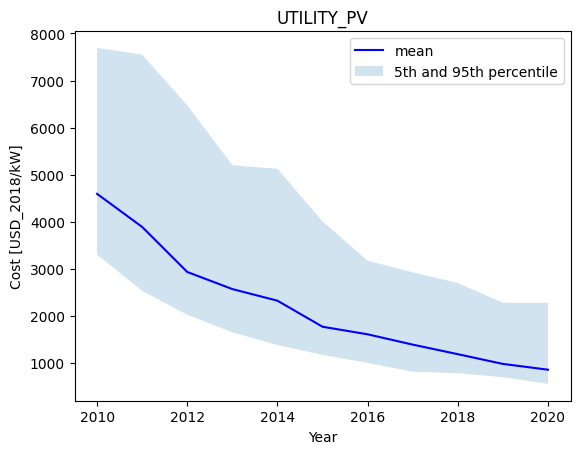

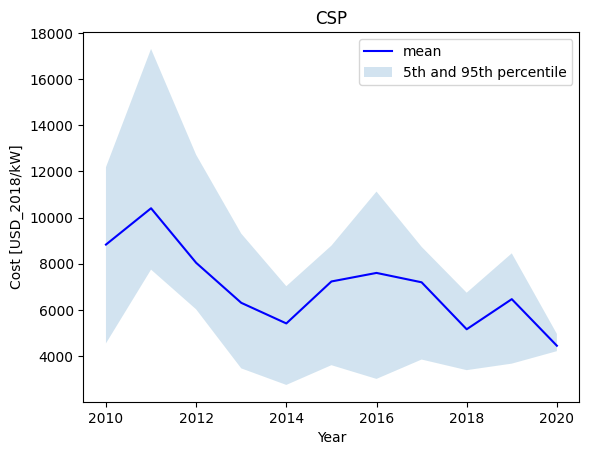

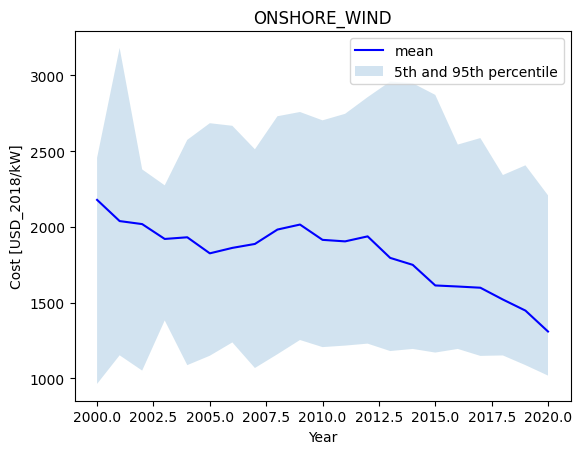

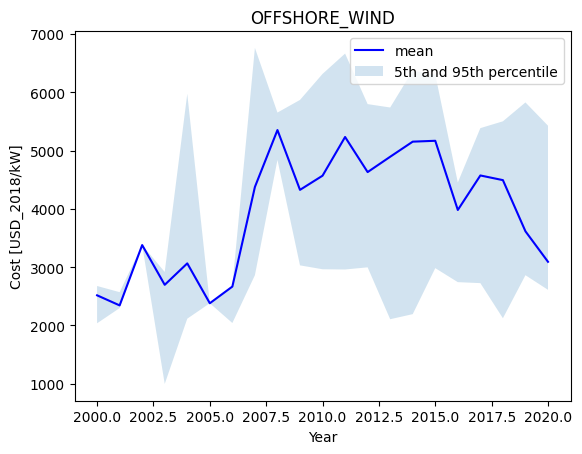

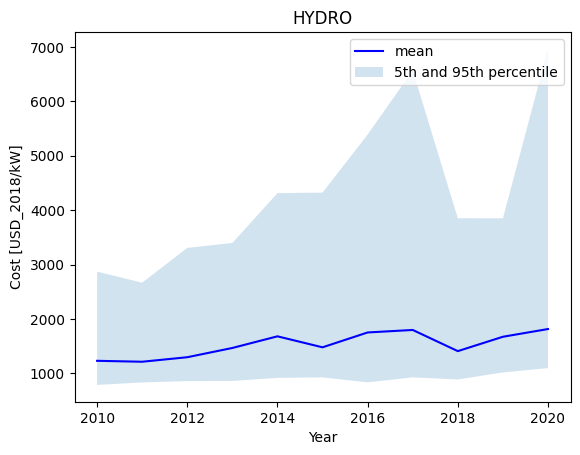

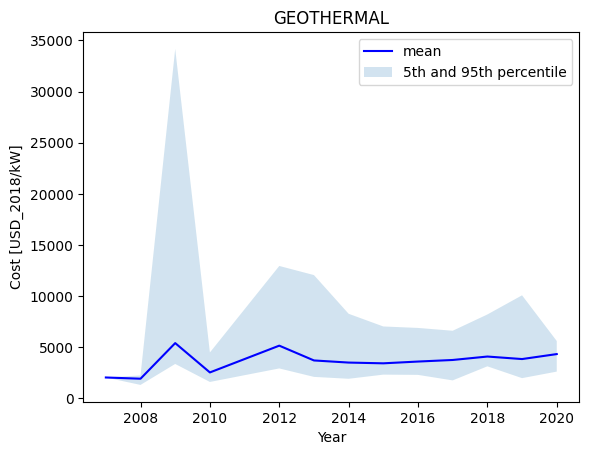

In [30]:
for tech in list(data.tech.unique()):
    graph_uncertainty(tech)

# Uniform distribution

## PDF and CDF

In [31]:
def cdf_unif_a_b(x,a,b):
    return ((x-a) / (b-a))

In [32]:
def cdf_unif(x,a,b):
    if (x<a):
        return 0
    elif (a<=x<=b):
        return ((x-a) / (b-a))
    else:
        return 1

In [33]:
def plot_cdf_unif(x,a,b):
    y = []
    for i in range(len(x)):
        y.append(cdf_unif(x[i],a,b))
    plt.plot(x, y, color='b', marker='', linestyle='solid')
    plt.xlabel("x")
    plt.ylabel("CDF(x)")
    plt.grid()
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


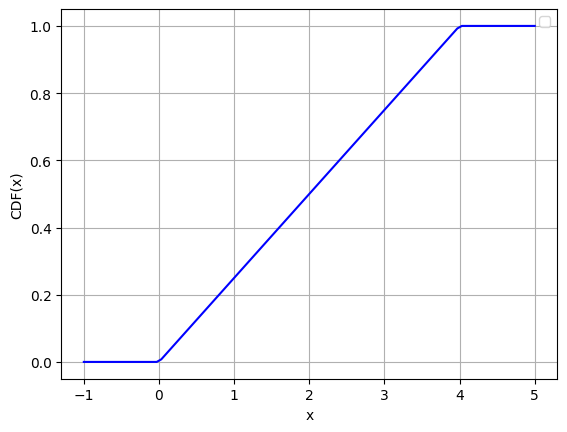

In [34]:
plot_cdf_unif(x=np.linspace(-1,5,100),a=0,b=4)

## System resolution with Sympy

In [35]:
x1 = sp.symbols("x1")
x2 = sp.symbols("x2")
a = sp.symbols("a")
b = sp.symbols("b")
equations = [((x1-a) / (b-a)) - 0.05,
             ((x2-a) / (b-a)) - 0.95]
sp.solve(equations, [a, b])

{a: 1.05555555555556*x1 - 0.0555555555555556*x2,
 b: -0.0555555555555556*x1 + 1.05555555555556*x2}

In [36]:
def a_unif(x):
    return 1.05555555555556*x[0] - 0.0555555555555556*x[1]

In [37]:
def b_unif(x):
    return -0.0555555555555556*x[0] + 1.05555555555556*x[1]

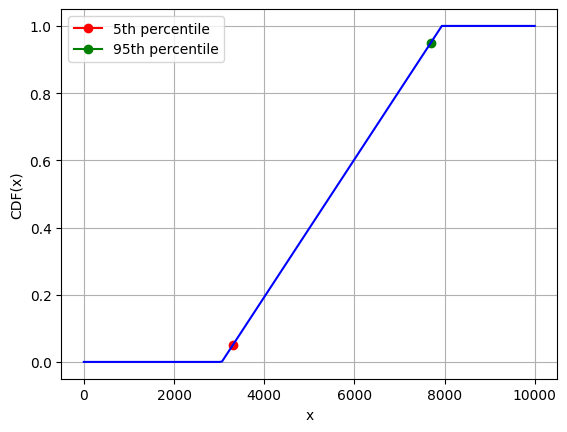

3059.1111111111254 7936.888888888923


In [38]:
a = a_unif(x=np.array([3303,7693]))
b = b_unif(np.array([3303,7693]))
x = np.linspace(0,10000,200)
plt.plot(3303, 0.05, marker='o', color='r',label='5th percentile')
plt.plot(7693, 0.95, marker='o', color='g',label='95th percentile')
plot_cdf_unif(x=x,a=a,b=b)
print(a, b)

## System resolution with fsolve

In [39]:
def res_unif(x, y0):
    # x is the input data, i.e. 5th and 95th percentiles values 
    # y0 is the initial guess for a and b 
    def equations_unif(y,perc_5=x[0], perc_95=x[1]):
        return [cdf_unif_a_b(perc_5,y[0],y[1]) - 0.05,
               cdf_unif_a_b(perc_95,y[0],y[1]) - 0.95]
    root = fsolve(equations_unif, y0)
    return root

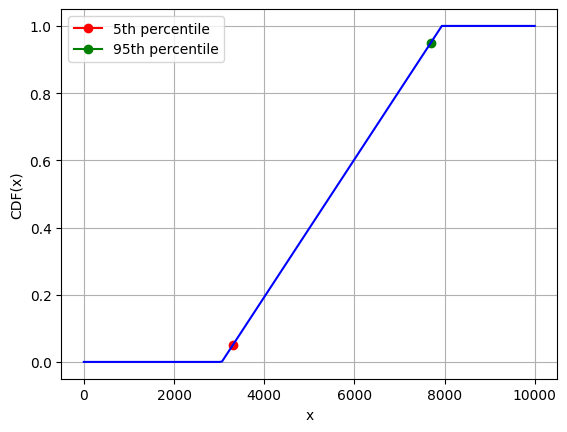

[3059.11111111 7936.88888889]


In [40]:
root = res_unif(x=np.array([3303,7693]), y0=[3303,7693])
x = np.linspace(0,10000,200)
a = root[0]
b = root[1]
plt.plot(3303, 0.05, marker='o', color='r',label='5th percentile')
plt.plot(7693, 0.95, marker='o', color='g',label='95th percentile')
plot_cdf_unif(x=x,a=a,b=b)
print(root)

# Triangular distribution

## PDF and CDF

In [41]:
def cdf_triang_inf_c(x,a,b,c):
    return((x-a)**2 / ((b-a)*(c-a)))

In [42]:
def cdf_triang_sup_c(x,a,b,c):
    return(1 - (b-x)**2 / ((b-a)*(b-c)))

In [43]:
def cdf_triang(x,a,b,c):
    if (x <= a):
        return 0
    elif (a < x <= c):
        return cdf_triang_inf_c(x,a,b,c)
    elif (c < x < b):
        return cdf_triang_sup_c(x,a,b,c)
    else: 
        return 1

In [44]:
def mean_triang(a,b,c):
    return((a+b+c) / 3)

In [45]:
def pdf_triang(x,a,b,c):
    if (x < a):
        return 0
    elif (a <= x < c):
        return(2*(x-a) / ((b-a)*(c-a)))
    elif (x==c):
        return(2 / (b-a))
    elif (c < x <= b):
        return(2*(b-x) / ((b-a)*(b-c)))
    else:
        return 0

In [176]:
def plot_cdf_triang(x,a,b,c):
    y = []
    for i in range(len(x)):
        y.append(cdf_triang(x[i],a,b,c))
    plt.plot(x, y, color='b', marker='', linestyle='solid')
    plt.axvline(x=mean_triang(a,b,c), color='g', linestyle='dashed')
    plt.xlabel("x")
    plt.ylabel("CDF(x)")
    plt.grid()
    plt.show()

In [175]:
def plot_pdf_triang(x,a,b,c):
    y = []
    for i in range(len(x)):
        y.append(pdf_triang(x[i],a,b,c))
    plt.plot(x, y, color='b', marker='', linestyle='solid')
    #plt.axvline(x=mean_triang(a,b,c), color='g', linestyle='dashed')
    plt.xlabel("x")
    plt.ylabel("PDF(x)")
    #plt.grid()
    plt.savefig("triangular_PDF.pdf", format="pdf")
    plt.show()

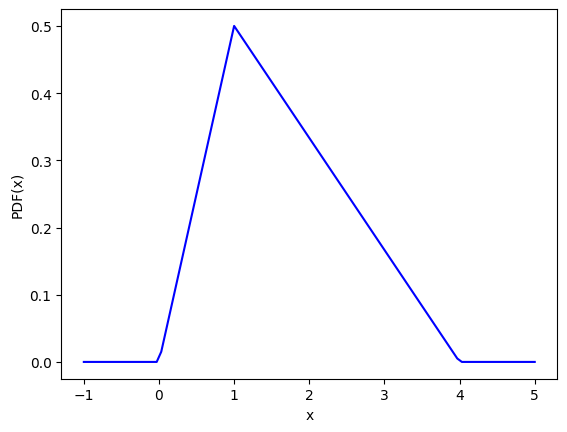

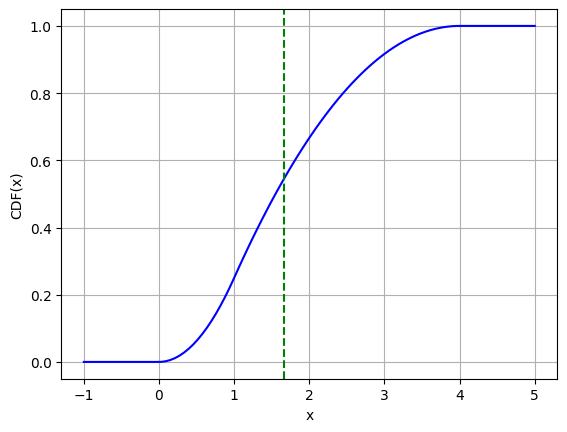

In [48]:
# Examples of triangular PDF
x = np.linspace(-1,5,100)
a = 0
b = 4
c = 1
plot_pdf_triang(x=x,a=a,b=b,c=c)
plot_cdf_triang(x=x,a=a,b=b,c=c)

## System resolution with sympy

In [60]:
def num_solve_triang(x0, x1, x2, p0, p1):
    '''Numerical solving of the non-linear system of equations for triangular CDF'''
    x_low = float(x0)
    x_exp = float(x1)
    x_high = float(x2)
    perc_low = float(p0)
    perc_high = float(p1)
    a = sp.symbols("a")
    b = sp.symbols("b")
    c = sp.symbols("c")
    equations = [(x_low-a)**2 / ((b-a)*(c-a)) - perc_low,
                 (1 - (b-x_high)**2 / ((b-a)*(b-c))) - perc_high,
                 (a+b+c)/3 - x_exp]
    root = sp.nsolve(equations, [a, b, c], [x_low-300, x_high+300, x_exp])
    return([float(root[0]), float(root[1]), float(root[2])])

## System resolution with fsolve

In [65]:
def res_triang(x, y0):
    def equations_triang(y,perc_5=x[0], perc_95=x[1], mean=x[2]):
        return [cdf_triang_inf_c(perc_5,y[0],y[1],y[2]) - 0.05,
               cdf_triang_sup_c(perc_95,y[0],y[1],y[2]) - 0.95,
               mean_triang(y[0],y[1],y[2]) - mean]
    root = fsolve(equations_triang, y0, xtol=1e-12, maxfev=500000)
    return root

In [109]:
def res_triang_2(x, y0):
    def equations_triang(y,perc_5=x[0], perc_95=x[1], mean=x[2]):
        return [cdf_triang_inf_c(perc_5,y[0],y[1],y[2]) - 0.05,
               cdf_triang_sup_c(perc_95,y[0],y[1],y[2]) - 0.95,
               y[2] - mean]
    root = fsolve(equations_triang, y0, xtol=1e-12, maxfev=500000)
    return root

C:\Users\matthieu.souttre\myenv\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


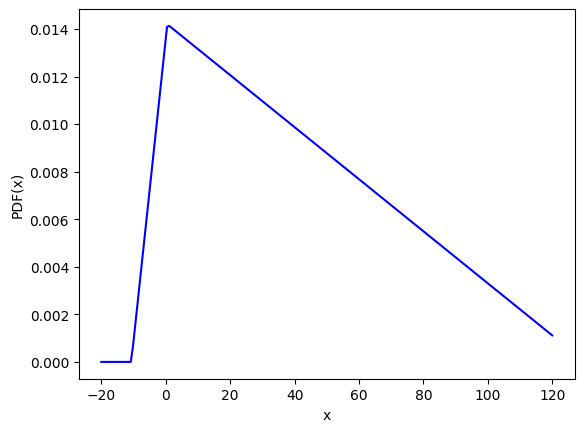

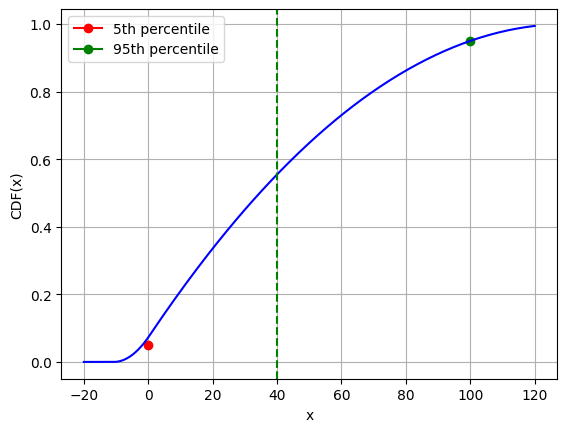

[-10.68813132 130.20299421   0.48635296]


In [111]:
root = res_triang(x=np.array([0,100,40]), y0=[0,100,40])
x = np.linspace(-20,120,200)
a = root[0]
b = root[1]
c = root[2]
plot_pdf_triang(x=x,a=a,b=b,c=c)
plt.plot(0,0.05,marker='o',label='5th percentile',color='r')
plt.plot(100,0.95,marker='o',label='95th percentile',color='g')
plt.legend()
plot_cdf_triang(x=x,a=a,b=b,c=c)
print(root)

# Weibull distribution

## PDF and CDF

Weibull distribution is fully determined by two parameters, namely lambda and k.

In [89]:
def cdf_weibull(x,a,b,c):
    if (x >= c):
        return 1 - np.exp(-((x-c)/a)**b)
    else:
        return 0

In [90]:
def pdf_weibull(x,a,b,c): 
    if (x >= c):
        return (b/a)*(((x-c)/a)**(b-1))*np.exp(-((x-c)/a)**b)
    else:
        return 0

In [91]:
def mean_weibull(a,b,c):
    return c + a*gamma(1+1/b)

In [106]:
def plot_cdf_weibull(x,a,b,c):
    y = []
    for i in range(len(x)):
        y.append(cdf_weibull(x[i],a,b,c))
    plt.plot(x, y, color='b', marker='', linestyle='solid')
    plt.xlabel("x")
    plt.ylabel("CDF(x)")
    plt.show()

In [107]:
def plot_pdf_weibull(x,a,b,c):
    y = []
    for i in range(len(x)):
        y.append(pdf_weibull(x[i],a,b,c))
    plt.plot(x, y, color='b', marker='', linestyle='solid')
    plt.xlabel("x")
    plt.ylabel("PDF(x)")
    plt.show()

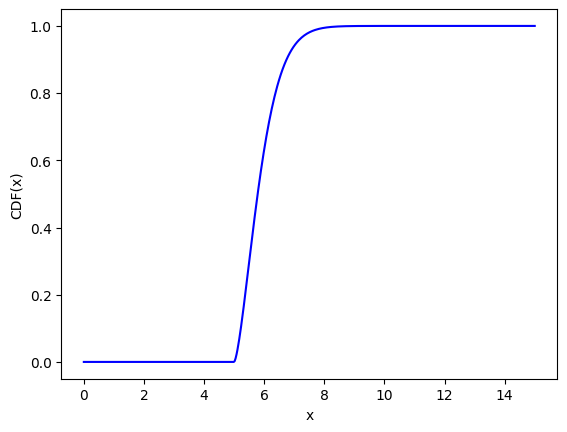

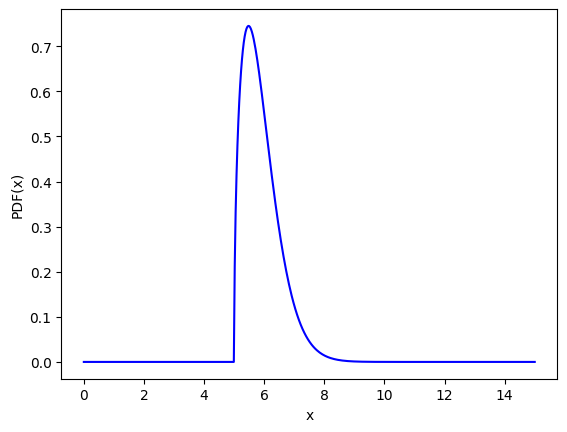

In [109]:
x = np.linspace(0,15,500)
plot_cdf_weibull(x,1,1.5,5)
plot_pdf_weibull(x,1,1.5,5)

## Regression

### Using scipy.curve_fit

In [93]:
xm = np.array([1303, 1493, 4693])
ym = np.array([0.05, 0.50, 0.95])

popt, pcov = curve_fit(cdf_weibull, xm, ym, p0 = [1000, 0, 0],maxfev=100000)

x = np.linspace(0, 9000, 300)
plt.plot(xm,ym,marker='o',ls='none')
plt.plot(x, cdf_weibull(x,popt[0],popt[1],popt[2]))
plt.show()
plt.plot(x, pdf_weibull(x,popt[0],popt[1],popt[2]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [73]:
print("Optimal parameters:", popt)

Optimal parameters: [ 3347126.28344526     8110.77053215 -3342882.80078646]


## System resolution

In [10]:
def solve_equations_weibull(x0, x1, x2, p0, p1):
    '''Numerical solving of the non-linear system of equations for Weibull'''
    x_low = float(x0)
    x_exp = float(x1)
    x_high = float(x2)
    perc_low = float(p0)
    perc_high = float(p1)
    a = sp.symbols("a", nonzero=True)
    b = sp.symbols("b", real=True)
    c = sp.symbols("c", real=True)
    
    equations = [1 - sp.exp(-((x_low-c)/a)**b) - perc_low,
                 1 - sp.exp(-((x_high-c)/a)**b) - perc_high,
                 1 - sp.exp(-((x_exp-c)/a)**b) - 0.50]
    
    #for i in range(len(equations)):
    #    equations[i] = sp.nsimplify(equations[i], rational=1)
    
    root = sp.nsolve(equations, [a, b, c], [2500, 1, 2000])
    return([float(root[0]), float(root[1]), float(root[2])])

In [11]:
root = solve_equations_weibull(x0=3303, x1=4593, x2=7693, p0=0.05, p1=0.95) 
root

[1977.0249034792666, 1.3019724476565129, 3101.0451430250723]

C:\Users\matthieu.souttre\AppData\Local\Temp\ipykernel_17132\3307987393.py:2: RuntimeWarning: invalid value encountered in power
  return 1 - np.exp(-((x-c)/a)**b)


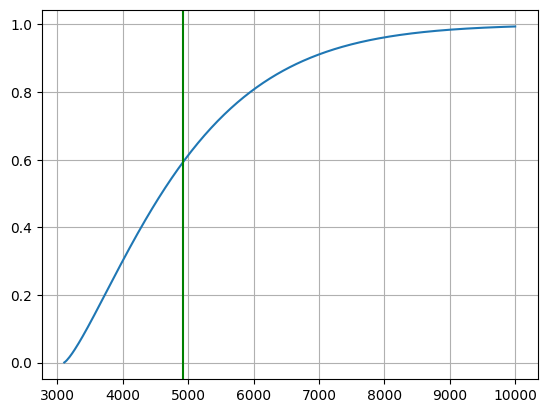

In [152]:
x = np.linspace(0,10000,500)
plt.grid()
plt.plot(x,cdf_weibull(x,root[0],root[1],root[2]))
plt.axvline(x=mean_weibull(root[0],root[1],root[2]), color='g')

C:\Users\matthieu.souttre\AppData\Local\Temp\ipykernel_17132\2571424737.py:2: RuntimeWarning: invalid value encountered in power
  return (b/a)*(((x-c)/a)**(b-1))*np.exp(-((x-c)/a)**b)


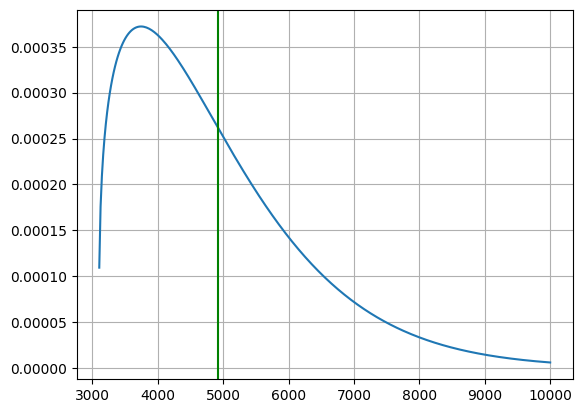

In [153]:
plt.grid()
plt.plot(x,pdf_weibull(x,root[0],root[1],root[2]))
plt.axvline(x=mean_weibull(root[0],root[1],root[2]), color='g')

# PERT distribution

## PDF and CDF

In [1]:
def B(a,b):
    return(gamma(a)*gamma(b)/gamma(a+b))

In [2]:
def pdf_pert(x,a,b,c): # a < b < c, a:min, c:max
    alpha = 1 + 4*(b-a)/(c-a)
    beta = 1 + 4*(c-b)/(c-a)
    return((x-a)**(alpha-1) * (c-x)**(beta-1) / (B(alpha, beta)*(c-a)**(alpha+beta-1)))

In [4]:
def cdf_pert(x,a,b,c):
    alpha = 1 + 4*(b-a)/(c-a)
    beta = 1 + 4*(c-b)/(c-a)
    z = (x-a)/(c-a)
    return betainc(alpha, beta, z)

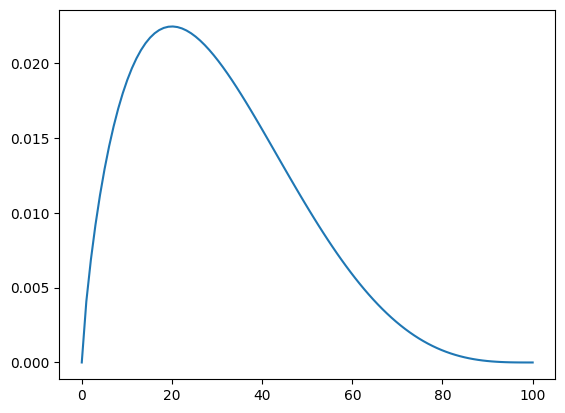

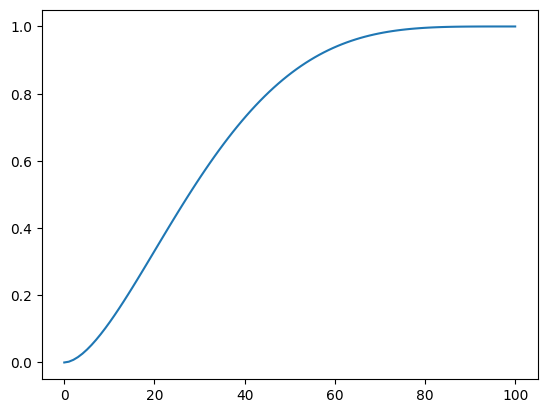

In [7]:
x = np.linspace(0,100,100)
plt.plot(x, pdf_pert(x=x,a=0,b=20,c=100))
plt.show()
plt.plot(x, cdf_pert(x=x,a=0,b=20,c=100))

## Curve fit

In [8]:
xm = np.array([1000, 2000, 4000])
ym = np.array([0.05, 0.50, 0.95])

popt, pcov = curve_fit(cdf_pert, xm, ym, p0 = [800, 2000, 4500], maxfev = 100000)

C:\Users\matthieu.souttre\myenv\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [9]:
popt

array([ 832.57694842, 1383.17087095, 6738.37456276])

# Generalized gamma distribution

## PDF and CDF

The gamma distribution is fully determined by 3 parameters, namely a, d and p. 

In [36]:
# Generalized Gamma distribution - Probability density function
def pdf_gamma(x,a,d,p):
    return (p/(a**d))*x**(d-1)*np.exp(-(x/a)**p)/gamma(d/p)

In [37]:
# Generalized Gamma distribution - Cumulative density function
def cdf_gamma(x,a,d,p):
    return gammainc(d/p,(x/a)**p)

In [38]:
def mean_gamma(a,d,p):
    return a*gamma((d+1)/p)/gamma(d/p)

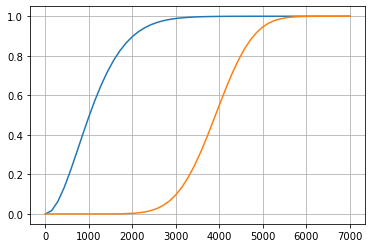

In [39]:
x = np.linspace(0,7000,50)
plt.grid()
plt.plot(x,cdf_gamma(x=x,a=1000,d=2,p=1.5))
plt.plot(x,cdf_gamma(x=x,a=3000,d=10,p=3.5))

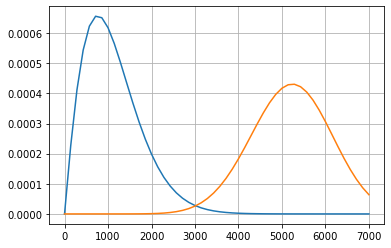

In [40]:
x = np.linspace(0,7000,50)
plt.grid()
plt.plot(x,pdf_gamma(x=x,a=1000,d=2,p=1.5))
plt.plot(x,pdf_gamma(x=x,a=4000,d=10,p=3.5))

## Regression

### scipy.curve_fit

C:\Users\QQ6354\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


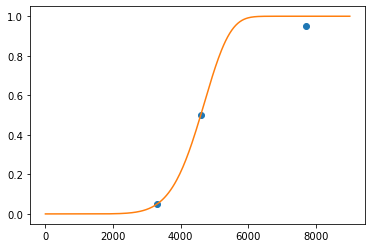

In [41]:
xm = np.array([3303, 4593, 7693])
ym = np.array([0.05, 0.50, 0.95])

popt, pcov = curve_fit(cdf_gamma, xm, ym, p0 = [7000, 10, 5],maxfev=1000000)

x = np.linspace(1, 9000, 300)
plt.plot(xm,ym,marker='o',ls='none')
plt.plot(x, cdf_gamma(x,popt[0],popt[1],popt[2]))

In [42]:
print("Optimal parameters:", popt)

Optimal parameters: [4604.85922936    8.35784096    6.44158213]


### GEKKO

In [55]:
xData = np.array([3303, 4592, 4594, 7693])
yData = np.array([0.05, 0.49, 0.51, 0.95]) # Needs 4 points to run (we have only 3 per year per tech)


m = GEKKO(remote=False)

# nonlinear regression
a = m.FV(lb=1000,ub=10000)
b = m.FV(lb=0.1,ub=20)
c = m.FV(lb=0.1,ub=20)
x = m.Param(value=xData); y = m.CV(yData)
a.STATUS=1; b.STATUS=1; c.STATUS=1; y.FSTATUS=1
m.Equation(y==1-m.exp(-(x/a)**b))

# cubic spline
z = m.Var()
m.cspline(x,z,xData,yData,True)

m.options.IMODE = 2; m.options.EV_TYPE = 2; m.options.MAX_ITER = 100000
m.solve(disp=False)

print("Optimal parameters:", a.value[0], b.value[0], c.value[0])

Optimal parameters: 4811.0136116 7.9026481545 8.4861354186


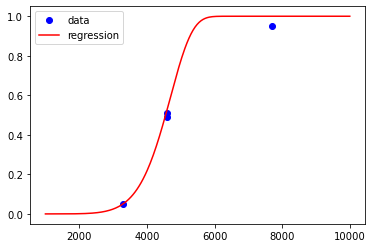

In [56]:
x = np.linspace(1000,10000,300)
y = cdf_gamma(x, a.value[0], b.value[0], c.value[0])
plt.plot(xData,yData,'bo',label='data')
plt.plot(x,y,'r-',label='regression')
plt.legend()
plt.show()